In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Brackets Data

In [2]:
brackets = pd.read_csv('data/tournaments.csv')

In [3]:
brackets.head()

,year,bracket,round,location,team_one_rank,team_one,team_one_score,team_two_rank,team_two,team_two_score,team_one_wins
0,1985,East,First Round,"Hartford, CT",1,Georgetown,68,16,Lehigh,43,True
1,1985,East,First Round,"Hartford, CT",8,Temple,60,9,Virginia Tech,57,True
2,1985,East,First Round,"Hartford, CT",5,SMU,85,12,Old Dominion,68,True
3,1985,East,First Round,"Hartford, CT",4,Loyola (IL),59,13,Iona,58,True
4,1985,East,First Round,"Atlanta, GA",6,Georgia,67,11,Wichita State,59,True


In [4]:
brackets.isna().sum()

year              0
bracket           0
round             0
location          0
team_one_rank     0
team_one          0
team_one_score    0
team_two_rank     0
team_two          0
team_two_score    0
team_one_wins     0
dtype: int64

In [5]:
brackets.dtypes

year               int64
bracket           object
round             object
location          object
team_one_rank      int64
team_one          object
team_one_score     int64
team_two_rank      int64
team_two          object
team_two_score     int64
team_one_wins       bool
dtype: object

In [6]:
upset_condition = (((brackets['team_one_rank'] > brackets['team_two_rank']) & (brackets['team_one_wins'] == True))
                  |((brackets['team_two_rank'] > brackets['team_one_rank']) & (brackets['team_one_wins'] == False))) 
upsets = brackets.loc[upset_condition]
upsets

,year,bracket,round,location,team_one_rank,team_one,team_one_score,team_two_rank,team_two,team_two_score,team_one_wins
16,1985,Midwest,First Round,"Tulsa, OK",8,USC,55,9,Illinois State,58,False
19,1985,Midwest,First Round,"Houston, TX",6,Texas Tech,53,11,Boston College,55,False
24,1985,Midwest,Second Round,"Tulsa, OK",5,Louisiana Tech,79,4,Ohio State,67,True
25,1985,Midwest,Second Round,"Houston, TX",11,Boston College,74,3,Duke,73,True
29,1985,Midwest,Elite Eight,"Dallas, TX",1,Oklahoma,61,2,Memphis,63,False
...,...,...,...,...,...,...,...,...,...,...,...
2371,2023,South,Second Round,"Sacramento, CA",7,Missouri,63,15,Princeton,78,False
2372,2023,South,Sweet Sixteen,"Louisville, KY",1,Alabama,64,5,San Diego State,71,False
2383,2023,West,Second Round,"Des Moines, IA",1,Kansas,71,8,Arkansas,72,False
2388,2023,West,Sweet Sixteen,"Las Vegas, NV",3,Gonzaga,79,2,UCLA,76,True


<AxesSubplot:xlabel='team_one_rank', ylabel='team_one_wins'>

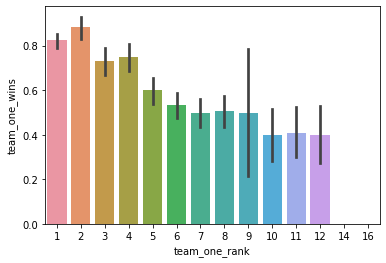

In [97]:
sns.barplot(data=brackets, x='team_one_rank', y='team_one_wins')

In [7]:
print(f"{len(upsets) / len(brackets) * 100:.2f}% of games in March Madness are upsets!")

28.25% of games in March Madness are upsets!


## Standings Data

In [80]:
standings = pd.read_csv('data/standings.csv')
standings

,year,conference,rank,team,overall_wins,overall_losses,overall_win_loss_percentage,conference_wins,conference_losses,conference_win_loss_percentage,own_points_per_game,opp_points_per_game,strength_of_schedule,simple_rating_system,ap_pre,ap_high,ap_final,conference_tournament_champion
0,1985,ACC,1.0,Georgia Tech,27.0,8.0,0.771,9.0,5.0,0.643,69.9,60.9,16.45,7.42,20.0,6.0,6.0,True
1,1985,ACC,2.0,North Carolina,27.0,9.0,0.750,9.0,5.0,0.643,73.1,65.9,15.33,8.13,NaN,5.0,7.0,False
2,1985,ACC,3.0,NC State,23.0,10.0,0.697,9.0,5.0,0.643,73.3,65.0,15.02,6.78,13.0,9.0,16.0,False
3,1985,ACC,4.0,Duke,23.0,8.0,0.742,8.0,6.0,0.571,78.9,67.9,18.38,7.38,6.0,2.0,10.0,False
4,1985,ACC,5.0,Maryland,25.0,12.0,0.676,8.0,6.0,0.571,70.8,65.3,13.92,8.47,NaN,17.0,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12453,2023,WCC,6.0,Brigham Young,19.0,15.0,0.559,7.0,9.0,0.438,74.1,70.1,9.43,5.40,NaN,NaN,NaN,False
12454,2023,WCC,7.0,Pacific,15.0,18.0,0.455,7.0,9.0,0.438,75.8,78.4,-0.56,2.05,NaN,NaN,NaN,False
12455,2023,WCC,8.0,Portland,14.0,19.0,0.424,5.0,11.0,0.313,76.7,79.1,1.68,4.13,NaN,NaN,NaN,False
12456,2023,WCC,9.0,San Diego,11.0,20.0,0.355,4.0,12.0,0.250,76.3,81.6,-2.06,3.28,NaN,NaN,NaN,False


In [81]:
standings.head()

,year,conference,rank,team,overall_wins,overall_losses,overall_win_loss_percentage,conference_wins,conference_losses,conference_win_loss_percentage,own_points_per_game,opp_points_per_game,strength_of_schedule,simple_rating_system,ap_pre,ap_high,ap_final,conference_tournament_champion
0,1985,ACC,1.0,Georgia Tech,27.0,8.0,0.771,9.0,5.0,0.643,69.9,60.9,16.45,7.42,20.0,6.0,6.0,True
1,1985,ACC,2.0,North Carolina,27.0,9.0,0.750,9.0,5.0,0.643,73.1,65.9,15.33,8.13,NaN,5.0,7.0,False
2,1985,ACC,3.0,NC State,23.0,10.0,0.697,9.0,5.0,0.643,73.3,65.0,15.02,6.78,13.0,9.0,16.0,False
3,1985,ACC,4.0,Duke,23.0,8.0,0.742,8.0,6.0,0.571,78.9,67.9,18.38,7.38,6.0,2.0,10.0,False
4,1985,ACC,5.0,Maryland,25.0,12.0,0.676,8.0,6.0,0.571,70.8,65.3,13.92,8.47,NaN,17.0,NaN,False


In [82]:
standings.dtypes

year                                int64
conference                         object
rank                              float64
team                               object
overall_wins                      float64
overall_losses                    float64
overall_win_loss_percentage       float64
conference_wins                   float64
conference_losses                 float64
conference_win_loss_percentage    float64
own_points_per_game               float64
opp_points_per_game               float64
strength_of_schedule              float64
simple_rating_system              float64
ap_pre                            float64
ap_high                           float64
ap_final                          float64
conference_tournament_champion       bool
dtype: object

In [83]:
standings.isna().sum()

year                                  0
conference                          132
rank                                132
team                                132
overall_wins                        132
overall_losses                      132
overall_win_loss_percentage         140
conference_wins                     439
conference_losses                   439
conference_win_loss_percentage      439
own_points_per_game                 219
opp_points_per_game                 219
strength_of_schedule                219
simple_rating_system                219
ap_pre                            11532
ap_high                           10804
ap_final                          11532
conference_tournament_champion        0
dtype: int64

In [84]:
standings = standings.dropna(subset=['conference'])
standings

,year,conference,rank,team,overall_wins,overall_losses,overall_win_loss_percentage,conference_wins,conference_losses,conference_win_loss_percentage,own_points_per_game,opp_points_per_game,strength_of_schedule,simple_rating_system,ap_pre,ap_high,ap_final,conference_tournament_champion
0,1985,ACC,1.0,Georgia Tech,27.0,8.0,0.771,9.0,5.0,0.643,69.9,60.9,16.45,7.42,20.0,6.0,6.0,True
1,1985,ACC,2.0,North Carolina,27.0,9.0,0.750,9.0,5.0,0.643,73.1,65.9,15.33,8.13,NaN,5.0,7.0,False
2,1985,ACC,3.0,NC State,23.0,10.0,0.697,9.0,5.0,0.643,73.3,65.0,15.02,6.78,13.0,9.0,16.0,False
3,1985,ACC,4.0,Duke,23.0,8.0,0.742,8.0,6.0,0.571,78.9,67.9,18.38,7.38,6.0,2.0,10.0,False
4,1985,ACC,5.0,Maryland,25.0,12.0,0.676,8.0,6.0,0.571,70.8,65.3,13.92,8.47,NaN,17.0,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12453,2023,WCC,6.0,Brigham Young,19.0,15.0,0.559,7.0,9.0,0.438,74.1,70.1,9.43,5.40,NaN,NaN,NaN,False
12454,2023,WCC,7.0,Pacific,15.0,18.0,0.455,7.0,9.0,0.438,75.8,78.4,-0.56,2.05,NaN,NaN,NaN,False
12455,2023,WCC,8.0,Portland,14.0,19.0,0.424,5.0,11.0,0.313,76.7,79.1,1.68,4.13,NaN,NaN,NaN,False
12456,2023,WCC,9.0,San Diego,11.0,20.0,0.355,4.0,12.0,0.250,76.3,81.6,-2.06,3.28,NaN,NaN,NaN,False


In [85]:
standings[['overall_win_loss_percentage']] = standings[['overall_win_loss_percentage']].fillna(value=0.0)

/var/folders/g4/3cyywnm54658_q0bqvzvdkk80000gn/T/ipykernel_10115/643120294.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  standings[['overall_win_loss_percentage']] = standings[['overall_win_loss_percentage']].fillna(value=0.0)


In [86]:
standings.dropna(subset=['conference_wins', 'own_points_per_game'], inplace=True)

/var/folders/g4/3cyywnm54658_q0bqvzvdkk80000gn/T/ipykernel_10115/3400896860.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  standings.dropna(subset=['conference_wins', 'own_points_per_game'], inplace=True)


In [87]:
standings[['ap_pre']] = standings[['ap_pre']].fillna(value=26.0) 

/var/folders/g4/3cyywnm54658_q0bqvzvdkk80000gn/T/ipykernel_10115/1375642856.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  standings[['ap_pre']] = standings[['ap_pre']].fillna(value=26.0)


In [88]:
standings[['ap_high']] = standings[['ap_high']].fillna(value=26.0) 

/var/folders/g4/3cyywnm54658_q0bqvzvdkk80000gn/T/ipykernel_10115/2819228817.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  standings[['ap_high']] = standings[['ap_high']].fillna(value=26.0)


In [89]:
standings[['ap_final']] = standings[['ap_final']].fillna(value=26.0) 

/var/folders/g4/3cyywnm54658_q0bqvzvdkk80000gn/T/ipykernel_10115/3623889249.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  standings[['ap_final']] = standings[['ap_final']].fillna(value=26.0)


In [90]:
standings.isna().sum()

year                              0
conference                        0
rank                              0
team                              0
overall_wins                      0
overall_losses                    0
overall_win_loss_percentage       0
conference_wins                   0
conference_losses                 0
conference_win_loss_percentage    0
own_points_per_game               0
opp_points_per_game               0
strength_of_schedule              0
simple_rating_system              0
ap_pre                            0
ap_high                           0
ap_final                          0
conference_tournament_champion    0
dtype: int64

In [93]:
standings

,year,conference,rank,team,overall_wins,overall_losses,overall_win_loss_percentage,conference_wins,conference_losses,conference_win_loss_percentage,own_points_per_game,opp_points_per_game,strength_of_schedule,simple_rating_system,ap_pre,ap_high,ap_final,conference_tournament_champion
0,1985,ACC,1.0,Georgia Tech,27.0,8.0,0.771,9.0,5.0,0.643,69.9,60.9,16.45,7.42,20.0,6.0,6.0,True
1,1985,ACC,2.0,North Carolina,27.0,9.0,0.750,9.0,5.0,0.643,73.1,65.9,15.33,8.13,26.0,5.0,7.0,False
2,1985,ACC,3.0,NC State,23.0,10.0,0.697,9.0,5.0,0.643,73.3,65.0,15.02,6.78,13.0,9.0,16.0,False
3,1985,ACC,4.0,Duke,23.0,8.0,0.742,8.0,6.0,0.571,78.9,67.9,18.38,7.38,6.0,2.0,10.0,False
4,1985,ACC,5.0,Maryland,25.0,12.0,0.676,8.0,6.0,0.571,70.8,65.3,13.92,8.47,26.0,17.0,26.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12453,2023,WCC,6.0,Brigham Young,19.0,15.0,0.559,7.0,9.0,0.438,74.1,70.1,9.43,5.40,26.0,26.0,26.0,False
12454,2023,WCC,7.0,Pacific,15.0,18.0,0.455,7.0,9.0,0.438,75.8,78.4,-0.56,2.05,26.0,26.0,26.0,False
12455,2023,WCC,8.0,Portland,14.0,19.0,0.424,5.0,11.0,0.313,76.7,79.1,1.68,4.13,26.0,26.0,26.0,False
12456,2023,WCC,9.0,San Diego,11.0,20.0,0.355,4.0,12.0,0.250,76.3,81.6,-2.06,3.28,26.0,26.0,26.0,False


## Join Brackets and Standings

In [159]:
data = pd.merge(brackets, standings, left_on=['team_one', 'year'], right_on=['team', 'year']).drop(['team'], axis=1)

In [160]:
data = pd.merge(data, standings, left_on=['team_two', 'year'], right_on=['team', 'year'], suffixes=('_one', '_two')).drop(['team'], axis=1)

In [162]:
print(list(data.columns))

['year', 'bracket', 'round', 'location', 'team_one_rank', 'team_one', 'team_one_score', 'team_two_rank', 'team_two', 'team_two_score', 'team_one_wins', 'conference_one', 'rank_one', 'overall_wins_one', 'overall_losses_one', 'overall_win_loss_percentage_one', 'conference_wins_one', 'conference_losses_one', 'conference_win_loss_percentage_one', 'own_points_per_game_one', 'opp_points_per_game_one', 'strength_of_schedule_one', 'simple_rating_system_one', 'ap_pre_one', 'ap_high_one', 'ap_final_one', 'conference_tournament_champion_one', 'conference_two', 'rank_two', 'overall_wins_two', 'overall_losses_two', 'overall_win_loss_percentage_two', 'conference_wins_two', 'conference_losses_two', 'conference_win_loss_percentage_two', 'own_points_per_game_two', 'opp_points_per_game_two', 'strength_of_schedule_two', 'simple_rating_system_two', 'ap_pre_two', 'ap_high_two', 'ap_final_two', 'conference_tournament_champion_two']


In [164]:
data

,year,bracket,round,location,team_one_rank,team_one,team_one_score,team_two_rank,team_two,team_two_score,...,conference_losses_two,conference_win_loss_percentage_two,own_points_per_game_two,opp_points_per_game_two,strength_of_schedule_two,simple_rating_system_two,ap_pre_two,ap_high_two,ap_final_two,conference_tournament_champion_two
0,1985,East,First Round,"Hartford, CT",1,Georgetown,68,16,Lehigh,43,...,8.0,0.429,65.0,70.1,-12.02,-6.89,26.0,26.0,26.0,True
1,1985,East,Second Round,"Hartford, CT",1,Georgetown,63,8,Temple,46,...,3.0,0.833,64.8,57.8,7.67,0.67,26.0,26.0,26.0,True
2,1985,East,Sweet Sixteen,"Providence, RI",1,Georgetown,65,4,Loyola (IL),53,...,1.0,0.929,83.5,77.3,10.29,4.07,26.0,14.0,14.0,True
3,1985,East,Elite Eight,"Providence, RI",1,Georgetown,60,2,Georgia Tech,54,...,5.0,0.643,69.9,60.9,16.45,7.42,20.0,6.0,6.0,True
4,1985,East,Sweet Sixteen,"Providence, RI",3,Illinois,53,2,Georgia Tech,61,...,5.0,0.643,69.9,60.9,16.45,7.42,20.0,6.0,6.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1859,2023,West,First Round,14\nGrand Canyon\n70,3,Gonzaga,82,14,Grand Canyon,70,...,7.0,0.588,72.2,69.1,4.43,1.27,26.0,26.0,26.0,True
1860,2023,West,Sweet Sixteen,"Las Vegas, NV",3,Gonzaga,79,2,UCLA,76,...,2.0,0.900,74.1,60.7,22.11,8.66,8.0,2.0,7.0,False
1861,2023,West,Second Round,"Sacramento, CA",7,Northwestern,63,2,UCLA,68,...,2.0,0.900,74.1,60.7,22.11,8.66,8.0,2.0,7.0,False
1862,2023,West,First Round,"Sacramento, CA",7,Northwestern,75,10,Boise State,67,...,5.0,0.722,71.5,65.0,12.78,6.21,26.0,26.0,26.0,False


In [165]:
data.to_csv('data/all_data.csv', sep=',', index=False, encoding='utf-8')